In [2]:
!pip  install pytrends


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd   
from pytrends.request import TrendReq
import matplotlib.pyplot as plt  
Trending_topics = TrendReq(hl = 'en-us', tz = 360)

C:\Users\91830\AppData\Local\Temp\ipykernel_17460\4244938997.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#1.build payload

kw_list = ["Cloud Conputing"]
Trending_topics.build_payload(kw_list, cat = 0, timeframe = 'today 12-m')

In [5]:
#2.Interest Over Time

Trending_topics.build_payload(kw_list = ["Cloud Computing"], cat = 0, timeframe= "today 12-m")
data = Trending_topics.interest_over_time()
data = data.sort_values(by = "Cloud Computing", ascending= False)
data = data.head(11)
print(data)

            Cloud Computing  isPartial
date                                  
2023-12-03              100      False
2023-12-10               94      False
2024-01-28               91      False
2023-11-26               88      False
2024-02-04               87      False
2023-10-08               87      False
2023-10-29               84      False
2023-11-19               84      False
2023-12-17               84      False
2023-09-24               83      False
2024-01-21               83      False


c:\Users\91830\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [18]:
##4.Interest By Region

data = Trending_topics.interest_by_region()
data = data.sort_values(by="Cloud Computing", ascending = False)
data = data.head(10)
print(data)

           Cloud Computing
geoName                   
Ethiopia               100
Zimbabwe                90
India                   67
Cameroon                62
Nepal                   61
Kenya                   50
Sri Lanka               43
Ghana                   42
Pakistan                38
Uganda                  36


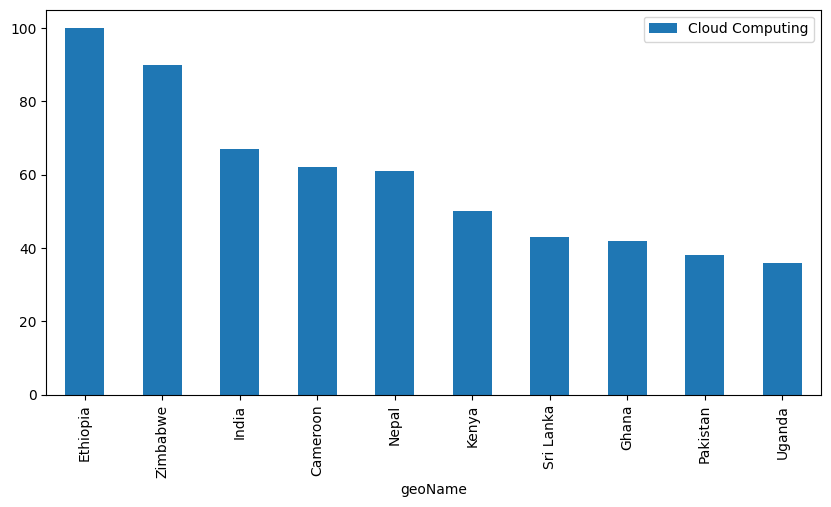

In [20]:
data.reset_index().plot( x ='geoName', y = 'Cloud Computing', figsize = (10,5), kind = "bar")
plt.style.use('fivethirtyeight')
plt.show()

In [21]:
##7.top charts

df = Trending_topics.top_charts(2023, hl = 'en-us',tz=300, geo = 'GLOBAL')
df.head(10)

,title,exploreQuery
0,War in Israel and Gaza,Israel Gaza
1,Titanic submarine,
2,Turkey earthquake,
3,Hurricane Hilary,
4,Hurricane Idalia,
5,Hurricane Lee,
6,Maine shooting,
7,Nashville shooting,
8,Chandrayaan-3,Chandrayaan 3
9,War in Sudan,Sudan


In [24]:
##8.Related Queries

Trending_topics.build_payload(kw_list = ['Cloud Computing'])
related_queries = Trending_topics.related_queries()
related_queries.values()

dict_values([{'top':                                                query  value
0                            what is cloud computing    100
1                                     cloud services     39
2                            cloud computing storage     18
3                  virtualization in cloud computing     17
4                         example of cloud computing     14
5                            iaas in cloud computing      9
6                                cloud computing mcq      5
7                             what is edge computing      4
8     infrastructure as a service in cloud computing      4
9  what describes the relationship between edge c...      1, 'rising':                                                query  value
0  what describes the relationship between edge c...  10400
1                             what is edge computing   1500
2                                cloud computing mcq    550
3     infrastructure as a service in cloud computing    350
4       

In [27]:
#9. Keyword Suggestion

keywords = Trending_topics.suggestions(keyword = 'Cloud Computing')
df = pd.DataFrame(keywords)
df.drop(columns='mid')

,title,type
0,Cloud computing,Topic
1,Cloud computing,Topic
2,Cloud computing security,Topic
3,Alibaba Cloud,Computer software company
4,System Design Interview - An Insider's Guide,Book by Alex Xu
